<a href="https://colab.research.google.com/github/rochismandatta/IBM_Capstone_Proj/blob/master/IBM_Capstone_Car_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

/bin/bash: conda: command not found
Folium installed and imported!


In [ ]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from IPython.display import display
LDN_COORDINATES = (47.60,-122.33)
seattle_map = folium.Map(LDN_COORDINATES, zoom_start=11)
# display map
display(seattle_map)

In [ ]:
#Interest points:
data2 = data.copy(deep = True)
data2['INCDTTM'] = pd.to_datetime(data2['INCDTTM'], errors='coerce')
  #data2['Year']=data2['INCDTTM'].dt.year
  #speed = data2[data2['SPEEDING'] == "Y", data2['Year'].isin([2017,2020])]
  #speed = speed[['X',"Y"]]
  #speed.dropna(inplace = True)

data2['Year']=data2['INCDTTM'].dt.year
data2['Month']=data2['INCDTTM'].dt.month
data2['Day']=data2['INCDTTM'].dt.day
data2['Weekday']=data2['INCDTTM'].dt.weekday
data2['Hour'] = data2['INCDTTM'].dt.hour
'''
alcohol = data2[data2['UNDERINFL'] == "Y"]
alcohol = alcohol[alcohol['Year'].isin([2015,2020])]
alcohol = alcohol[['X',"Y"]]
alcohol.dropna(inplace = True)
#print(alcohol.head())

billboard = data2[data2['INATTENTIONIND'] == "Y"]
billboard = billboard[billboard['Year'].isin([2015,2020])]
billboard = billboard[['X',"Y"]]
billboard.dropna(inplace = True)
#print(billboard.head())

parked = data2[data2['HITPARKEDCAR'] == "Y"]
parked = parked[parked['Year'].isin([2015,2020])]
parked = parked[['X',"Y"]]
parked.dropna(inplace = True)
#print(parked.head())
'''


'\nalcohol = data2[data2[\'UNDERINFL\'] == "Y"]\nalcohol = alcohol[alcohol[\'Year\'].isin([2015,2020])]\nalcohol = alcohol[[\'X\',"Y"]]\nalcohol.dropna(inplace = True)\n#print(alcohol.head())\n\nbillboard = data2[data2[\'INATTENTIONIND\'] == "Y"]\nbillboard = billboard[billboard[\'Year\'].isin([2015,2020])]\nbillboard = billboard[[\'X\',"Y"]]\nbillboard.dropna(inplace = True)\n#print(billboard.head())\n\nparked = data2[data2[\'HITPARKEDCAR\'] == "Y"]\nparked = parked[parked[\'Year\'].isin([2015,2020])]\nparked = parked[[\'X\',"Y"]]\nparked.dropna(inplace = True)\n#print(parked.head())\n'

In [ ]:
speed = data2[data2['SPEEDING'] == "Y"]
speed = speed[speed['Year'].isin([2017,2020])]
#speed_sev1 = speed[speed['SEVERITYCODE'] == 1]
#print(speed_sev1["SEVERITYCODE"].value_counts())


speed_sev1 = speed[speed['SEVERITYCODE'] == 1]
speed_sev2 = speed[speed['SEVERITYCODE'] == 2]
speed_sev1 = speed_sev1[['X',"Y"]]
speed_sev2 = speed_sev2[['X',"Y"]]
speed.dropna(inplace = True)
speed_sev1.dropna(inplace = True)
speed_sev2.dropna(inplace = True)
print(speed_sev1.count())
print(speed_sev2.count())

X    233
Y    233
dtype: int64
X    155
Y    155
dtype: int64


In [ ]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(speed_sev1.Y, speed_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(speed_sev2.Y, speed_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map1 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map1.add_child(incidents1)
seattle_map1.add_child(incidents2)

##Remeber to segregate by Severity

In [ ]:
alcohol = data2[data2['UNDERINFL'] == "Y"]
alcohol = alcohol[alcohol['Year'].isin([2017,2020])]


alc_sev1 = alcohol[alcohol['SEVERITYCODE'] == 1]
alc_sev2 = alcohol[alcohol['SEVERITYCODE'] == 2]
alc_sev1 = alc_sev1[['X',"Y"]]
alc_sev2 = alc_sev2[['X',"Y"]]

alc_sev1.dropna(inplace = True)
alc_sev2.dropna(inplace = True)
print(alc_sev1.count())
print(alc_sev2.count())

X    268
Y    268
dtype: int64
X    162
Y    162
dtype: int64


In [ ]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(alc_sev1.Y, alc_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(alc_sev2.Y, alc_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

In [ ]:
billboard = data2[data2['INATTENTIONIND'] == "Y"]
billboard = billboard[billboard['Year'].isin([2017,2020])]


bill_sev1 = billboard[billboard['SEVERITYCODE'] == 1]
bill_sev2 = billboard[billboard['SEVERITYCODE'] == 2]
bill_sev1 = bill_sev1[['X',"Y"]]
bill_sev2 = bill_sev2[['X',"Y"]]

bill_sev1.dropna(inplace = True)
bill_sev2.dropna(inplace = True)
print(bill_sev1.count())
print(bill_sev2.count())

X    1268
Y    1268
dtype: int64
X    687
Y    687
dtype: int64


In [ ]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(bill_sev1.Y, bill_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(bill_sev2.Y, bill_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map3 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map3.add_child(incidents1)
seattle_map3.add_child(incidents2)

In [ ]:
parked = data2[data2['HITPARKEDCAR'] == "Y"]
parked = parked[parked['Year'].isin([2020])]


park_sev1 = parked[parked['SEVERITYCODE'] == 1]
park_sev2 = parked[parked['SEVERITYCODE'] == 2]
park_sev1 = park_sev1[['X',"Y"]]
park_sev2 = park_sev2[['X',"Y"]]

park_sev1.dropna(inplace = True)
park_sev2.dropna(inplace = True)
print(park_sev1.count())
print(park_sev2.count())

X    281
Y    281
dtype: int64
X    30
Y    30
dtype: int64


In [ ]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(park_sev1.Y, park_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(park_sev2.Y, park_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map4 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map4.add_child(incidents1)
seattle_map4.add_child(incidents2)

In [ ]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [ ]:
data.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [ ]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [ ]:
y = data['SEVERITYCODE'].values

In [ ]:
data['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [ ]:
X = data[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','COLLISIONTYPE','HITPARKEDCAR']]
#X2 = X.copy(deep = True)

In [ ]:
X['INCDTTM'] = pd.to_datetime(X['INCDTTM'], errors='coerce')
X['Year']=X['INCDTTM'].dt.year
X['Month']=X['INCDTTM'].dt.strftime('%b')
X['Day']=X['INCDTTM'].dt.day
X['Hour']=X['INCDTTM'].dt.hour
X['Weekend']=X['INCDTTM'].dt.weekday
X.drop(['INCDTTM'],axis = 1,inplace = True)
X[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN,Angles,N,2004,Jan,28,8,2


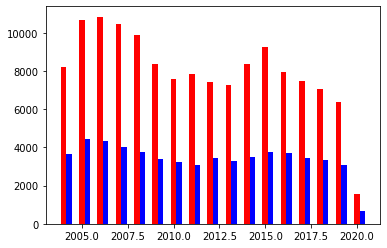

In [ ]:
##Time plotting of accidents
years  = data2['Year'].unique()
width = 0.3
for year in years:
  X2 = data2[data2['Year'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.show()

In [62]:
data3 = data2['Year'] == 2020].drop()
years  = data3['Month'].unique()
width = 0.3
for year in years:
  X2 = data3[data3['Month'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.show()

ValueError: ignored

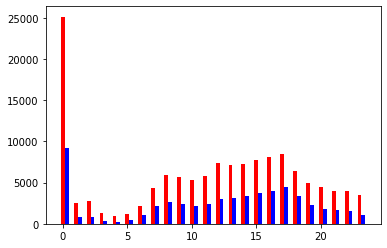

In [ ]:
years  = data2['Hour'].unique()
width = 0.3
for year in years:
  X2 = data2[data2['Hour'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.show()

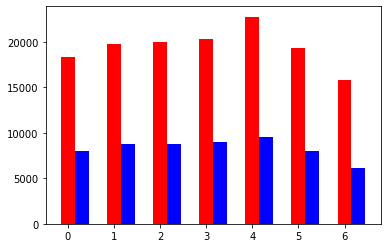

In [ ]:
years  = data2['Weekday'].unique()
width = 0.3
for year in years:
  X2 = data2[data2['Weekday'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.show()

In [ ]:
X['INATTENTIONIND'].replace('Y',1,inplace = True)
X['INATTENTIONIND'] = X['INATTENTIONIND'].fillna(0)
X['UNDERINFL'] = X['UNDERINFL'].fillna(0)
X['UNDERINFL'].replace('Y',1,inplace =True)
X['UNDERINFL'].replace('N',0,inplace =True)
X['PEDROWNOTGRNT'].replace('Y',1,inplace =True)
X['PEDROWNOTGRNT'] = X['PEDROWNOTGRNT'].fillna(0)
X['SPEEDING'].replace('Y',1,inplace =True)
X['SPEEDING'] = X['SPEEDING'].fillna(0)
X[0:5]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,0.0,0,Overcast,Wet,Daylight,0.0,0.0,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,0.0,0,Raining,Wet,Dark - Street Lights On,0.0,0.0,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,0.0,0,Overcast,Dry,Daylight,0.0,0.0,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,0.0,0,Clear,Dry,Daylight,0.0,0.0,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,0.0,0,Raining,Wet,Daylight,0.0,0.0,Angles,N,2004,Jan,28,8,2


In [ ]:
print(len(X["ROADCOND"].unique()))
X["ROADCOND"].replace(X["ROADCOND"].unique(),[i for i in range(1,1+len(X["ROADCOND"].unique()))],inplace = True)
X["ROADCOND"] = X["ROADCOND"].fillna(0)
X[0:10]


10


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,0.0,0,Overcast,1,Daylight,0.0,0.0,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,0.0,0,Raining,1,Dark - Street Lights On,0.0,0.0,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,0.0,0,Overcast,2,Daylight,0.0,0.0,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,0.0,0,Clear,2,Daylight,0.0,0.0,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,0.0,0,Raining,1,Daylight,0.0,0.0,Angles,N,2004,Jan,28,8,2
5,Intersection,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Angles,N,2019,Apr,20,17,5
6,Intersection,2,0,0,2,0.0,0,Raining,1,Daylight,0.0,0.0,Angles,N,2008,Dec,9,0,1
7,Intersection,3,0,1,1,0.0,0,Clear,2,Daylight,0.0,0.0,Cycles,N,2020,Apr,15,17,2
8,Block,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Parked Car,N,2006,Jun,15,13,3
9,Intersection,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Angles,N,2006,Mar,20,15,0


In [ ]:
X["WEATHER"].replace(X["WEATHER"].unique(),[i for i in range(1,1+len(X["WEATHER"].unique()))],inplace = True)
X["WEATHER"] = X["WEATHER"].fillna(0)

X["LIGHTCOND"].replace(X["LIGHTCOND"].unique(),[i for i in range(1,1+len(X["LIGHTCOND"].unique()))],inplace = True)
X["LIGHTCOND"] = X["LIGHTCOND"].fillna(0)

X["ADDRTYPE"].replace(X["ADDRTYPE"].unique(),[i for i in range(1,1+len(X["ADDRTYPE"].unique()))],inplace = True)
X["ADDRTYPE"] = X["ADDRTYPE"].fillna(0)

X["Month"].replace(X["Month"].unique(),[i for i in range(1,1+len(X["Month"].unique()))],inplace = True)
X["Month"] = X["Month"].fillna(0)



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
X.head()
X.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(X.COLLISIONTYPE.unique()))

LabelEncoder()

In [ ]:
X["COLLISIONTYPE"].replace(X["COLLISIONTYPE"].unique(),[i for i in range(1,1+len(X["COLLISIONTYPE"].unique()))],inplace = True)
X["COLLISIONTYPE"] = X["COLLISIONTYPE"].fillna(0)

X["HITPARKEDCAR"].replace(X["HITPARKEDCAR"].unique(),[i for i in range(1,1+len(X["HITPARKEDCAR"].unique()))],inplace = True)
X["HITPARKEDCAR"] = X["HITPARKEDCAR"].fillna(0)

X[0:5]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,1,2,0,0,2,0.0,0,1,1,1,0.0,0.0,1,1,2013,1,27,14,2
1,2,2,0,0,2,0.0,0,2,1,2,0.0,0.0,2,1,2006,2,20,18,2
2,2,4,0,0,3,0.0,0,1,2,1,0.0,0.0,3,1,2004,3,18,10,3
3,2,3,0,0,3,0.0,0,3,2,1,0.0,0.0,4,1,2013,1,29,9,4
4,1,2,0,0,2,0.0,0,2,1,1,0.0,0.0,1,1,2004,4,28,8,2


In [ ]:
X['INATTENTIONIND'] = X['INATTENTIONIND'].astype(int)
X['SPEEDING'] = X['SPEEDING'].astype(int)
X[0:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,1,2,0,0,2,0,0,1,1,1,0.0,0,1,1,2013,1,27,14,2
1,2,2,0,0,2,0,0,2,1,2,0.0,0,2,1,2006,2,20,18,2
2,2,4,0,0,3,0,0,1,2,1,0.0,0,3,1,2004,3,18,10,3
3,2,3,0,0,3,0,0,3,2,1,0.0,0,4,1,2013,1,29,9,4
4,1,2,0,0,2,0,0,2,1,1,0.0,0,1,1,2004,4,28,8,2
5,1,2,0,0,2,0,0,3,2,1,0.0,0,1,1,2019,5,20,17,5
6,1,2,0,0,2,0,0,2,1,1,0.0,0,1,1,2008,2,9,0,1
7,1,3,0,1,1,0,0,3,2,1,0.0,0,5,1,2020,5,15,17,2
8,2,2,0,0,2,0,0,3,2,1,0.0,0,3,1,2006,6,15,13,3
9,1,2,0,0,2,0,0,3,2,1,0.0,0,1,1,2006,1,20,15,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:

X = StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
'''
Tried to balance the data-set using SMOTE: Results were poorer.
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state = 4,ratio = 1.0)
X_train_res,y_train_res = sm.fit_sample(X_train, y_train)
'''


19


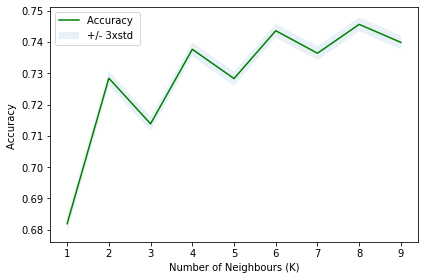

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
print('KNN')
y_hat = knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test, y_hat))

KNN
KNN Accuracy:  0.7284191601386927
F1 Score
0.6923005957978059
Jaccard
0.7284191601386927


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat =  LR.predict(X_test)
print('Logistic Regression')
print("LR Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test,y_hat))


Logistic Regression
LR Accuracy:  0.752253756260434
F1 Score
0.7083537226599758
Jaccard
0.752253756260434


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Feature: 0, Score: -0.33375
Feature: 1, Score: 0.28089
Feature: 2, Score: 0.50795
Feature: 3, Score: 0.48840
Feature: 4, Score: 0.06431
Feature: 5, Score: 0.08338
Feature: 6, Score: 0.10662
Feature: 7, Score: -0.05805
Feature: 8, Score: -0.15570
Feature: 9, Score: -0.14370
Feature: 10, Score: 0.02689
Feature: 11, Score: 0.12228
Feature: 12, Score: 0.22780
Feature: 13, Score: -0.25959
Feature: 14, Score: 0.06619
Feature: 15, Score: 0.04208
Feature: 16, Score: -0.00836
Feature: 17, Score: 0.00600
Feature: 18, Score: -0.03498


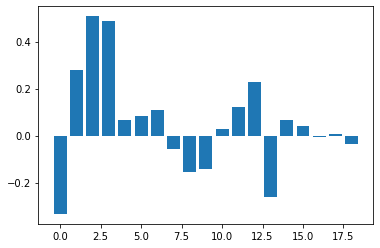

In [ ]:
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_hat = dt.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.6857326313085912
F1 Score
0.6869648798061264
Jaccard Similarity
0.6857326313085912


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
clf = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
print('XGBoost')
y_hat = clf.predict(X_test)
print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test,y_hat))

XGBoost
XGBoost's Accuracy:  0.7629639142160011
F1 Score
0.7275912596183378
Jaccard Similarity
0.7629639142160011


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


[0.02028692 0.06733859 0.207039   0.24447267 0.04043719 0.00791223
 0.02458902 0.06431133 0.06126108 0.01831033 0.00958071 0.01768854
 0.19400577 0.00911685 0.0035155  0.00395693 0.00174351 0.0021102
 0.00232353]


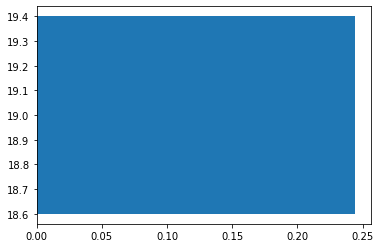

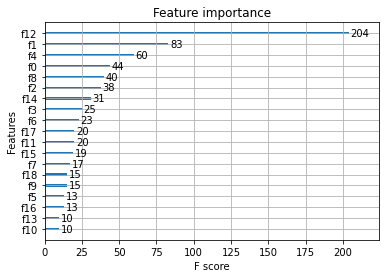

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
clf = XGBClassifier(random_state=4).fit(X_train,y_train)
print(clf.feature_importances_)


plot_importance(clf)

plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=4).fit(X_train,y_train)
print('Random Forest')
y_hat = clf.predict(X_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test,y_hat ))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

Random Forest
Random Forest's Accuracy:  0.7601386926929498
F1 Score
0.7151559801860554
Jaccard Similarity
0.7601386926929498


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
y_hat =clf.predict(X_test)
print('SVM')
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

SVM
SVM's Accuracy:  0.7593424939000899
F1 Score
0.71460047770524
Jaccard Similarity
0.7593424939000899


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
